In [78]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider
from IPython.display import display

h = 6.626e-34  #(Joule second)
c = 3.0e8      #(m/s)
kB = 1.38e-23  #(Joule per Kelvin)

def update_plot(temperature):
    wavelengths = np.linspace(0, 0.01, 1000)  # meters
    alt_w = 40 * wavelengths
    # Set floating-point error handling
    with np.errstate(divide='ignore', invalid='ignore', over='ignore'):
        # Set a temperature limit to avoid overflow issues
        temperature_limit = 1e-10
        temperature = np.maximum(temperature, temperature_limit)

        intensity = np.where(temperature >= temperature_limit,
                             (2 * h * c ** 2 / wavelengths ** 5) / (
                                 np.exp((h * c) / (wavelengths * kB * temperature)) - 1
                             ),
                             0.0)
        alt_i = np.where(temperature >= temperature_limit,
                             (2 * h * c ** 2 / alt_w ** 5) / (
                                 np.exp((h * c) / (alt_w * kB * temperature)) - 1
                             ),
                             0.0)
        rat= alt_i / intensity
        # Plot only where intensity is valid
        valid_indices = np.isfinite(intensity)
    
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.plot(wavelengths[valid_indices] * 1e3, intensity[valid_indices], color='b', label=f'CMB (T={temperature}K)')
        #ax.plot(alt_w[valid_indices] * 1e3, alt_i[valid_indices], color='b', label=f'CMB (T={temperature}K)')
        #ax.plot(alt_w[valid_indices] * 1e3, rat[valid_indices], color='b', label=f'CMB (T={temperature}K)')
        ax.set_xlim(0.5, 10)
        ax.set_xlabel('Wavelength (mm)')
        ax.set_ylabel('Specific Intensity ($W \cdot m^{-2} \cdot sr^{-1}$))')
        #ax.set_ylabel('ratio of intensity')
        #ax.set_title('Cosmic Microwave Background Blackbody Radiation')
        ax.grid(True)
        ax.legend()
        plt.show()

temperature_slider = FloatSlider(value=2.72, min=1e-10, max=5.0, step=0.01, description='Temperature (K)')
interactive_plot = interactive(update_plot, temperature=temperature_slider)

display(interactive_plot)


interactive(children=(FloatSlider(value=2.72, description='Temperature (K)', max=5.0, min=1e-10, step=0.01), O…

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider
from IPython.display import display

h = 6.626e-34  #(Joule second)
c = 3.0e8      #(m/s)
kB = 1.38e-23  #(Joule per Kelvin)

def update_plot(temperature):
    wavelengths = np.linspace(0, 0.01, 1000)  # meters

    # Set floating-point error handling
    with np.errstate(divide='ignore', invalid='ignore', over='ignore'):
        # Set a temperature limit to avoid overflow issues
        temperature_limit = 1e-10
        temperature = np.maximum(temperature, temperature_limit)

        intensity = np.where(temperature >= temperature_limit,
                             (2 * h * c ** 2 / wavelengths ** 5) / (
                                 np.exp((h * c) / (wavelengths * kB * temperature)) - 1
                             ),
                             0.0)

        # Plot only where intensity is valid
        valid_indices = np.isfinite(intensity)
    
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.plot(wavelengths[valid_indices] * 1e3, intensity[valid_indices], color='b', label=f'CMB (T={temperature}K)')
        ax.set_xlim(0.5, 10)
        ax.set_xlabel('Wavelength (mm)')
        ax.set_ylabel('Specific Intensity (W($m^{-2}\cdot sr^{-1}$))')
        ax.set_title('Cosmic Microwave Background Blackbody Radiation')
        ax.grid(True)
        ax.legend()
        plt.show()

temperature_slider = FloatSlider(value=2.72, min=1e-10, max=5.0, step=0.01, description='Temperature (K)')
interactive_plot = interactive(update_plot, temperature=temperature_slider)

display(interactive_plot)


interactive(children=(FloatSlider(value=2.72, description='Temperature (K)', max=5.0, min=1e-10, step=0.01), O…

In [72]:
#CMB diff
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

c = 3e8  
T_CMB = 2.725  
h = 6.626e-34
k = 1.38e-23

frequency_band = np.linspace(150, 160, 100)
 
def update_plot(velocity):
    f_v= frequency_band * (1 + velocity)
    temperature_variation = T_CMB * (1+ velocity)

    intensity_no_velocity = (2 * ((frequency_band * 1e9)**3) * h ) / (c**2 * (np.exp(h * frequency_band * 1e9 / (k * T_CMB)) - 1))
    intensity_with_velocity = ((1+velocity)**3) * (2 * ((frequency_band * 1e9) **3) * h) / (c**2 * (np.exp(h * frequency_band * 1e9 / (k * T_CMB)) - 1))

    intensity_ratio = (intensity_with_velocity / intensity_no_velocity)
    v=np.cbrt(intensity_ratio) 
    print(v)
    plt.figure(figsize=(8, 6))
    plt.plot(frequency_band, intensity_ratio)
    plt.grid(True)
    plt.title(f'Specific Intensity Ratio of CMB Radiation (v/c = {velocity})')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Intensity Ratio')
    plt.show()

# Set up the interactive widget
velocity_slider = FloatSlider(value=0.002, min=-0.5, max=0.5, step=0.0001, description='Relative Velocity (m/s)')
interact(update_plot, velocity=velocity_slider);


interactive(children=(FloatSlider(value=0.002, description='Relative Velocity (m/s)', max=0.5, min=-0.5, step=…

<ipython-input-58-21d00542a5fd>:15: RuntimeWarning: overflow encountered in exp
  B_lambda = (2 * h * c**2) / (lambda_range**5) * 1 / (np.exp((h * c) / (lambda_range * K_B * T_CMB), dtype=np.float64) - 1)


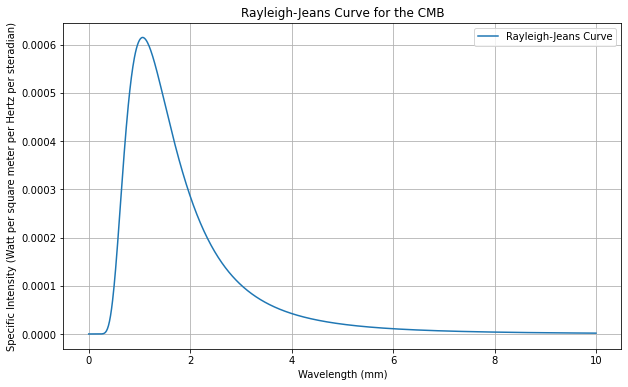

In [58]:
#RJ graph
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.626e-34  # Planck's constant in J·s
c = 3e8        # Speed of light in m/s
K_B = 1.381e-23  # Boltzmann constant in J/K
T_CMB = 2.725  # Temperature of the CMB in Kelvin

# Wavelength range for plotting (in meters)
lambda_range = np.linspace(1e-7, 10e-3, 1000)  # 1e-7 meters to 10 millimeters

# Calculate specific intensity using the Rayleigh-Jeans formula
B_lambda = (2 * h * c**2) / (lambda_range**5) * 1 / (np.exp((h * c) / (lambda_range * K_B * T_CMB), dtype=np.float64) - 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_range * 1e3, B_lambda, label='Rayleigh-Jeans Curve')
plt.title('Rayleigh-Jeans Curve for the CMB')
plt.xlabel('Wavelength (mm)')
plt.ylabel('Specific Intensity (Watt per square meter per Hertz per steradian)')
plt.legend()
plt.grid(True)
plt.show()



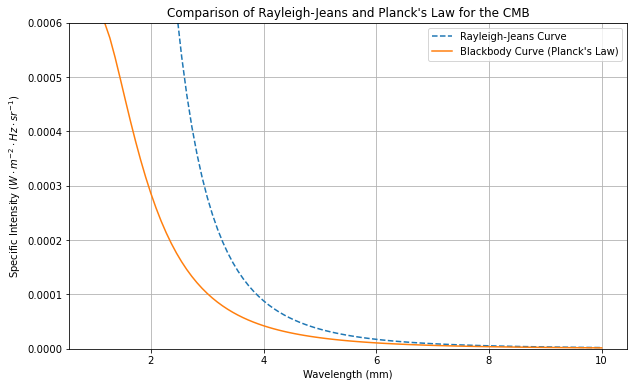

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.626e-34  # Planck's constant in J·s
c = 3e8        # Speed of light in m/s
K_B = 1.381e-23  # Boltzmann constant in J/K
T_CMB = 2.725  # Temperature of the CMB in Kelvin

# Wavelength range for plotting (in meters)
lambda_range = np.linspace(1e-3, 10e-3, 100)  


B_lambda_rayleigh_jeans = (2 * K_B * c * T_CMB) / lambda_range**4

B_lambda_planck = (2 * h * c**2) / (lambda_range**5) * 1 / (np.exp((h * c) / (lambda_range * K_B * T_CMB)) - 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot((lambda_range + 1e-6) * 1e3, B_lambda_rayleigh_jeans, label='Rayleigh-Jeans Curve', linestyle='--')  # Added a small offset to avoid log(0) in Rayleigh-Jeans
plt.plot(lambda_range * 1e3, B_lambda_planck, label='Blackbody Curve (Planck\'s Law)')
plt.title('Comparison of Rayleigh-Jeans and Planck\'s Law for the CMB')
plt.xlabel('Wavelength (mm)')
plt.ylabel('Specific Intensity ($W\cdot m^{-2} \cdot Hz \cdot sr^{-1}$)')
plt.legend()
plt.grid(True)


plt.ylim(0, 0.0006)

plt.show()


In [60]:
#Power law graph of quasars
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from ipywidgets import interactive, FloatSlider
from IPython.display import display
c = 3e8
def power_law_quasars(velocity):
    v = np.linspace(1, 10, 1000)  # gigahertz
    v_1 = v * (1 + velocity/c)
    flux = (v_1 * 1e9) ** (-2)

    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(v, flux, color='b', label=f'Quasars (Velocity={velocity})')
    ax.set_xlabel('Frequency (GHz)')
    ax.set_ylabel('Flux ($s^{-1}m^{-2}Hz^{-1}$)')
    ax.set_title('Power Law Plot for Quasars')
    ax.grid(True)
    ax.legend()
    plt.show()


velocity_slider = FloatSlider(value=0.00000000, min=-5000, max=5000, step=100, description='Relative Velocity')


interactive_plot = interactive(power_law_quasars, velocity=velocity_slider)


display(interactive_plot)


interactive(children=(FloatSlider(value=0.0, description='Relative Velocity', max=5000.0, min=-5000.0, step=10…

In [75]:
#POWER LAW SHIFT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from ipywidgets import interactive, FloatSlider
from IPython.display import display

def power_law_quasars(relative_velocity):
    v = np.linspace(1, 10, 100)  # Frequency in gigahertz
    v_1 = v * (1 + relative_velocity)
    flux = (v_1 * 1e9) ** (-2)

    original_flux = (v * 1e9) ** (-2)
    flux_difference = (flux - original_flux) #/ original_flux
    #print(flux_difference)

    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(v, flux_difference, color='b', label=f'Quasars (Relative Velocity={relative_velocity})')
    ax.set_xlabel('Frequency (GHz)')
    ax.set_ylabel('Flux Difference ($s^{-1}m^{-2}Hz^{-1}$)')
    ax.set_title('Power Law Plot for Quasars')
    ax.grid(True)
    ax.legend()

    max_flux_difference = flux_difference.max()
    #ax.text(0.5, 0.95, f'Flux Difference: {max_flux_difference:.4f}', transform=ax.transAxes, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

    plt.show()


velocity_slider = FloatSlider(value=0.00006, min=-1.0, max=1.0, step=0.001, description='Relative Velocity')


interactive_plot = interactive(power_law_quasars, relative_velocity=velocity_slider)


display(interactive_plot)


interactive(children=(FloatSlider(value=6e-05, description='Relative Velocity', max=1.0, min=-1.0, step=0.001)…

In [62]:
#POWER LAW MAGNITUDE DIFFERENCE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from ipywidgets import interactive, FloatSlider
from IPython.display import display

def magnitude_difference_quasars(relative_velocity):
    v = np.linspace(1, 10, 100)  # gigahertz
    v_1 = v * (1 + relative_velocity)
    flux = (v_1 * 1e9)**(-2)

    
    flux_ref = (v * 1e9)**(-2)

    # Calculate 2.5 * log10(flux / flux_ref)
    mag_difference = 2.5 * np.log10(flux / flux_ref)
    print(mag_difference)

    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(v, mag_difference, color='b', label=f'Quasars (Relative Velocity={relative_velocity})')
    ax.set_xlabel('Frequency (GHz)')
    ax.set_ylabel('Magnitude Difference (mag)')
    ax.set_title('Magnitude Difference Plot for Quasars')
    ax.grid(True)
    ax.legend()

    
    max_mag_difference = mag_difference.max()
    ax.text(0.5, 0.95, f'Max Magnitude Difference: {max_mag_difference:.4f} mag', transform=ax.transAxes, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

    plt.show()


velocity_slider = FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.001, description='Relative Velocity')


interactive_plot = interactive(magnitude_difference_quasars, relative_velocity=velocity_slider)


display(interactive_plot)


interactive(children=(FloatSlider(value=0.0, description='Relative Velocity', max=1.0, min=-1.0, step=0.001), …

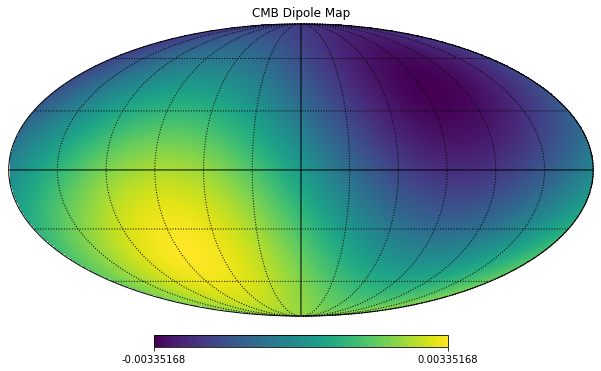

In [63]:
#CMB healpy map
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt


nside = 128


theta = np.radians(48.26)
phi = np.radians(263.99)
t = 2.725
v = 369000
c = 3e8
cmb_dipole_vector = hp.ang2vec(theta, phi)


cmb_dipole_map = np.zeros(hp.nside2npix(nside))


for i in range(hp.nside2npix(nside)):
    pixel_theta, pixel_phi = hp.pix2ang(nside, i)
    pixel_vector = hp.ang2vec(pixel_theta, pixel_phi)
    dot_product = np.dot(cmb_dipole_vector, pixel_vector)
    cmb_dipole_map[i] = dot_product


cmb_dipole_map *= (t * (v * np.cos(pixel_theta)) / c)


hp.mollview(cmb_dipole_map, title='CMB Dipole Map',)
hp.graticule()
plt.show()


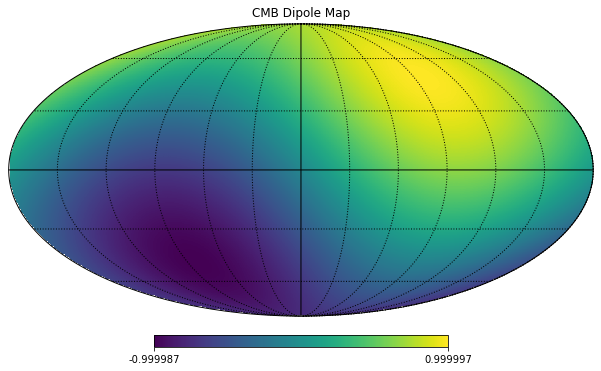

In [64]:
#WRONG CMB MAP
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nside = 512  # HEALPix resolution parameter (typically a power of 2)

# Direction of the CMB dipole in spherical coordinates (theta, phi)
theta = np.radians(90 - 48.26)  # Co-latitude (90 degrees - Galactic latitude)
phi = np.radians(263.99)  # Galactic longitude

# Average temperature of the CMB in Kelvin
average_temperature = 2.725

# Convert spherical coordinates to 3D vector in Cartesian coordinates
cmb_dipole_vector = hp.ang2vec(theta, phi)

# Generate a CMB dipole map
cmb_dipole_map = np.zeros(hp.nside2npix(nside))

# Loop through all pixels and calculate the dot product
for i in range(hp.nside2npix(nside)):
    pixel_theta, pixel_phi = hp.pix2ang(nside, i)
    pixel_vector = hp.ang2vec(pixel_theta, pixel_phi)
    dot_product = np.dot(cmb_dipole_vector, pixel_vector)
    cmb_dipole_map[i] = dot_product

# Normalize the map
#cmb_dipole_map *= average_temperature / np.mean(cmb_dipole_map)

# Visualize the CMB dipole map
hp.mollview(cmb_dipole_map, title='CMB Dipole Map')
hp.graticule()
plt.show()  # Display the map


[-3.63664105e-19+0.00000000e+00j -4.56687584e-03+0.00000000e+00j
  1.46857032e-19+0.00000000e+00j -1.81909023e-19+0.00000000e+00j
 -3.78954523e-04+3.59946814e-03j  1.96842968e-20-1.59542333e-19j
 -1.41367142e-19-2.11760589e-19j  3.24867927e-21-3.84540224e-19j
  1.11641312e-21-5.10288177e-23j -8.78400054e-20+2.79957394e-19j]


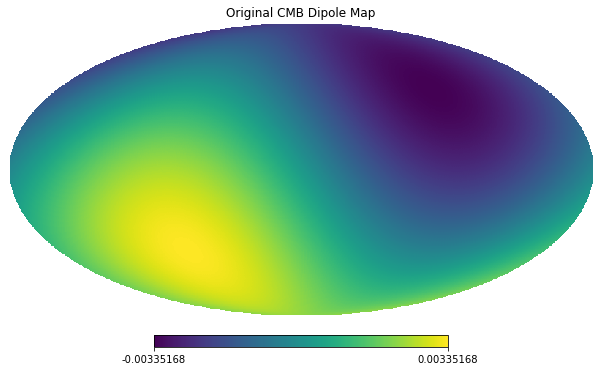

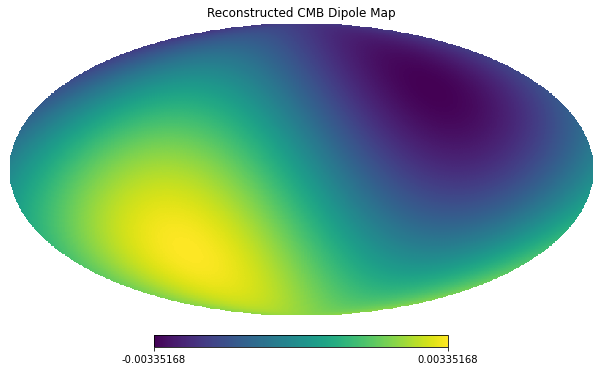

In [66]:
#using map2alm and map2alm
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

nside = 128

# Generate CMB dipole map
theta = np.radians(48.26)
phi = np.radians(263.99)
t = 2.725
v = 369000
c = 3e8
cmb_dipole_vector = hp.ang2vec(theta, phi)
cmb_dipole_map = np.zeros(hp.nside2npix(nside))

for i in range(hp.nside2npix(nside)):
    pixel_theta, pixel_phi = hp.pix2ang(nside, i)
    pixel_vector = hp.ang2vec(pixel_theta, pixel_phi)
    dot_product = np.dot(cmb_dipole_vector, pixel_vector)
    cmb_dipole_map[i] = dot_product

cmb_dipole_map *= (t * (v * np.cos(pixel_theta)) / c)

# spherical harmonic 
lmax = 3  
cmb_dipole_alm = hp.map2alm(cmb_dipole_map, lmax=lmax)
print(cmb_dipole_alm)

# original map
hp.mollview(cmb_dipole_map, title='Original CMB Dipole Map')
plt.show()
# map from spherical harmonic coefficients
cmb_reconstructed_map = hp.alm2map(cmb_dipole_alm, nside=nside)

# Plot the reconstructed map
hp.mollview(cmb_reconstructed_map, title='Reconstructed CMB Dipole Map')
plt.show()


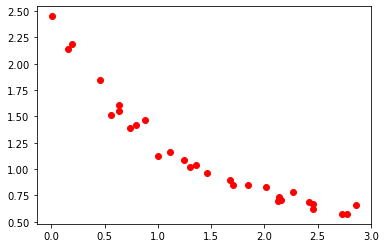

 Fit result status= 2  NEval= 7  cost=xi2= 0.04529174725561319
 fres.x= [ 0.48163601  1.9811007  -0.96040933]
 Fitted params: A=x[0]= 0.48163600968166553 B=x[1]= 1.981100702742683  gamma=x[2]= -0.9604093267020781
 Fit result with bounds  status= 2  NEval= 7  cost=xi2= 0.04529174725561266
 fres.x= [ 0.48163599  1.98110071 -0.9604093 ]
 Fitted params: A=x[0]= 0.4816359919447413 B=x[1]= 1.9811007092358437  gamma=x[2]= -0.9604092992445449
 Dipole Fit result with bounds  status= 3  NEval= 10  cost=xi2= 45.77262639219839
 fres.x= [2.70007218 0.0028859  1.06282441 1.90035896]
 Dipole Amp= 0.0028859023038911268  ThetaDipol/pi= 0.3383075168828326  PhiDipole/pi= 0.6049030436454708
 Xi2/ndof = 0.4767981915853999


In [81]:

#  Example for non linear Xi^2 fittingof a 
###  A/ : example fit for a non linear function of points x_data, y_data
###  B/ : example fit for dipole direction  

#  Importing packages
import math as m
import numpy as np
import scipy as scp
import random as rnd 
import matplotlib.pyplot as plt

###############################################################
#### A/ : example fit for a non linear function of points x_data, y_data

#  In this example, we define f(x) = A+B*exp(gamma*x) 
def func_model(x,A,B,gamma) :
  return A+B*m.exp(gamma*x) 


# define our fiducial parameters
A0=0.5
B0=2;
gamma0=-1

# Create a data set : x_data and y_data 
# x_data = np.array([-0.4,-0.26,0.1,0.3,0.55,0.87,1.18,1.37,1.886,2.35,2.634,2.92])
# get a random generator with seed initialized
rng=np.random.default_rng()  
x_data = 3*rng.random(30)

y_data = np.zeros(x_data.size)
# Fill y_data with the model func_model(x_data, A0, omega0, phi0)
# and add error to each point 
for i in range(x_data.size) :
  y_data[i]=func_model(x_data[i],A0,B0,gamma0)
  y_data[i]+=rnd.gauss(0,0.05)


#  Plot our data set 
plt.plot(x_data,y_data,'ro')
plt.show()


# Now, perform a Xi^2 fit on the data points to find out the model parameters
# which represents best the data
#  We need to define a function used by the scipy non linear fitting procedure
#  which is scipy.optimize.least_squares

# The function we provide has a single argument which are the model parameters
# and should return an array with the residuals Y_data - model
def fun_residuals(param) :
  resid = np.zeros(x_data.size)
  for i in range(x_data.size) :
    resid[i]=y_data[i]-func_model(x_data[i],param[0],param[1],param[2])
  return resid


# We perform now the fit - we need to give a starting values for the parameters [ A,B,gamma] 
p0 = [0.,1.,0.]

fres=scp.optimize.least_squares(fun_residuals,p0)
# Print the result
print(' Fit result status=',fres.status,' NEval=',fres.nfev,' cost=xi2=',fres.cost)
print(' fres.x=',fres.x)
print(' Fitted params: A=x[0]=',fres.x[0],'B=x[1]=',fres.x[1],' gamma=x[2]=',fres.x[2])

# Fit with bounds on parameters  -5<A<+5 , -10<B<+10 , -5<gamma<+5
fres=scp.optimize.least_squares(fun_residuals,p0,bounds=([-5,-10,-5], [5,10,5]))
print(' Fit result with bounds  status=',fres.status,' NEval=',fres.nfev,' cost=xi2=',fres.cost)
print(' fres.x=',fres.x)
print(' Fitted params: A=x[0]=',fres.x[0],'B=x[1]=',fres.x[1],' gamma=x[2]=',fres.x[2])

# popt, pcov = scp.optimize.curve_fit(func_model, x_data, y_data, p0)  # bounds=(0, [3., 1., 0.5]))
# print(popt)


###############################################################
###  B/ : example fit for dipole direction  

#  Let's define a model for a map pixel parameter
#  pix(theta,phi) = T0 + deltaT u(theta,phi).u(theta_dipole,phi_dipole) 
def cmb_model(tet,phi,T0,delT,tet_dip,phi_dip) :
  udotudip=m.sin(tet)*m.sin(tet_dip)*(m.cos(phi)*m.cos(phi_dip)+m.sin(phi)*m.sin(phi_dip))
  udotudip+=m.cos(tet)*m.cos(tet_dip)
  return T0+delT*udotudip


# Define our fiducial parameters
T0=2.7
delT=2.7*1e-3
tet_dip=m.pi/3.
phi_dip=m.pi*2/3.

#  Define number of pixels , and corresponding theta, phi, generated randomly 
NPIX=100
rng=np.random.default_rng()  
tet_pix=rng.random(NPIX)*0.99*m.pi
phi_pix=rng.random(NPIX)*2*m.pi

#  Define noise level on map pixels 
Tnoise=1.e-3
# Fill val_pix (map pixel values data) with the model cmb_model(tet_pix, phi_pix ...) 
# and add noise to each pixel  
val_pix = np.zeros(NPIX)
for i in range(val_pix.size) :
  val_pix[i]=cmb_model(tet_pix[i],phi_pix[i],T0,delT,tet_dip,phi_dip)
  val_pix[i]+=rnd.gauss(0, Tnoise)


# Define a function with a single parameter, which is a list with model parameters (T0,delT,tet_dip,phi_dip) and returns a vector of residuals
def cmb_residuals(param) :
  resid = np.zeros(val_pix.size)
  for i in range(val_pix.size) :
    resid[i]=(val_pix[i]-cmb_model(tet_pix[i],phi_pix[i], param[0],param[1],param[2],param[3]))/Tnoise
  return resid

# Now, perform a Xi^2 fit on the map pixels the dipole parameters
# Fit with bounds on parameters  0<T0<10 , 0<delT<0.05 , 0<tet_dip<pi , 0<phi_dip<2 pi
p0cmb = [3.,0.003,m.pi/2,m.pi]

fres=scp.optimize.least_squares(cmb_residuals,p0cmb,bounds=([0,0,0,0], [10,0.05,m.pi,2*m.pi]))
print(' Dipole Fit result with bounds  status=',fres.status,' NEval=',fres.nfev,' cost=xi2=',fres.cost)
print(' fres.x=',fres.x)
print(' Dipole Amp=',fres.x[1],' ThetaDipol/pi=',fres.x[2]/m.pi, ' PhiDipole/pi=',fres.x[3]/m.pi)
print(' Xi2/ndof =',fres.cost/(NPIX-4))



In [ ]:
#DIPOLE FIT (WORKING) BUT USING DIRECT INPUTS
import math as m
import numpy as np
from scipy import optimize
import random as rnd 
import matplotlib.pyplot as plt


def cmb_model(tet, phi, T0, delT, tet_dip, phi_dip):
    udotudip = m.sin(m.radians(tet)) * m.sin(m.radians(tet_dip)) * (m.cos(m.radians(phi)) * m.cos(m.radians(phi_dip)) + m.sin(m.radians(phi)) * m.sin(m.radians(phi_dip)))
    udotudip += m.cos(m.radians(tet)) * m.cos(m.radians(tet_dip))
    return T0 + delT * udotudip


T0 = 2.7
delT = 2.7 * 1e-3
tet_dip = 48.26  # CMB dipole polar angle
phi_dip = 263.99  # CMB dipole azimuthal angle

]
NPIX = 100
rng = np.random.default_rng()  
tet_pix = rng.random(NPIX) * 180  # Random theta values in degrees
phi_pix = rng.random(NPIX) * 360  # Random phi values in degrees

# Noise level on map pixels 
Tnoise = 1.e-3

# Generate synthetic data for the map pixels with added random noise
val_pix = np.zeros(NPIX)
for i in range(val_pix.size):
    val_pix[i] = cmb_model(tet_pix[i], phi_pix[i], T0, delT, tet_dip, phi_dip)
    val_pix[i] += rnd.gauss(0, Tnoise)  # Add mean=0, standard deviation=Tnoise

# Define a function with a single parameter for the fitting procedure
def cmb_residuals(param):
    resid = np.zeros(val_pix.size)
    for i in range(val_pix.size):
        resid[i] = (val_pix[i] - cmb_model(tet_pix[i], phi_pix[i], param[0], param[1], param[2], param[3])) / Tnoise
    return resid

# Perform a nonlinear least-squares fit on the map pixels to determine the dipole parameters
# Fit with bounds on parameters  0<T0<10 , 0<delT<0.05 , 0<tet_dip<pi , 0<phi_dip<2 pi
p0cmb = [3., 0.003, tet_dip, phi_dip]
fres = optimize.least_squares(cmb_residuals, p0cmb, bounds=([0, 0, 0, 0], [10, 0.05, 180, 360]))

# Print the fitting results with angles in degrees
print('Dipole Fit result with bounds  status=', fres.status, 'NEval=', fres.nfev, 'cost=xi2=', fres.cost)
print('fres.x=', fres.x)
print('Dipole Amp=', fres.x[1], 'ThetaDipol=', fres.x[2], 'PhiDipole=', fres.x[3])
print('Xi2/ndof =', fres.cost / (NPIX - 4))


In [ ]:
import numpy as np
from scipy import optimize
import random as rnd 
import matplotlib.pyplot as plt
import healpy as hp


def cmb_model(tet, phi, T0, delT, tet_dip, phi_dip):
    udotudip = np.sin(np.radians(tet)) * np.sin(np.radians(tet_dip)) * (np.cos(np.radians(phi)) * np.cos(np.radians(phi_dip)) + np.sin(np.radians(phi)) * np.sin(np.radians(phi_dip)))
    udotudip += np.cos(np.radians(tet)) * np.cos(np.radians(tet_dip))
    return T0 + delT * udotudip


nside = 128  # adjust as needed
npix = hp.nside2npix(nside)
tet_pix, phi_pix = hp.pix2ang(nside, range(npix), lonlat=True)


T0 = 2.7
delT = 2.7 * 1e-3
tet_dip = 53.1  # CMB dipole polar angle
phi_dip = 112.5  # CMB dipole azimuthal angle

# Generate synthetic data for the map pixels with added random noise
val_pix = cmb_model(tet_pix, phi_pix, T0, delT, tet_dip, phi_dip)
val_pix += np.random.normal(0, 1e-3, npix)  # Add Gaussian noise  # Add Gaussian noise


hp.mollview(val_pix, title='CMB Dipole Map', unit='mK', cmap='viridis')


tet_pix_deg = np.degrees(tet_pix)
phi_pix_deg = np.degrees(phi_pix)


def cmb_residuals(param, tet_deg, phi_deg, data):
    resid = data - cmb_model(tet_deg, phi_deg, param[0], param[1], param[2], param[3])
    return resid


p0cmb = [3., 0.003, tet_dip, phi_dip]
fres = optimize.least_squares(cmb_residuals, p0cmb, args=(tet_pix_deg, phi_pix_deg, val_pix), bounds=([0, 0, 0, 0], [10, 0.05, 180, 360]))


print('Dipole Fit result with bounds  status=', fres.status, 'NEval=', fres.nfev, 'cost=xi2=', np.sum(fres.fun**2))
print('fres.x=', fres.x)
print('Dipole Amp=', fres.x[1], 'ThetaDipol=', fres.x[2], 'PhiDipole=', fres.x[3])
print('Xi2/ndof =', np.sum(fres.fun**2) / (npix - 4))


plt.show()


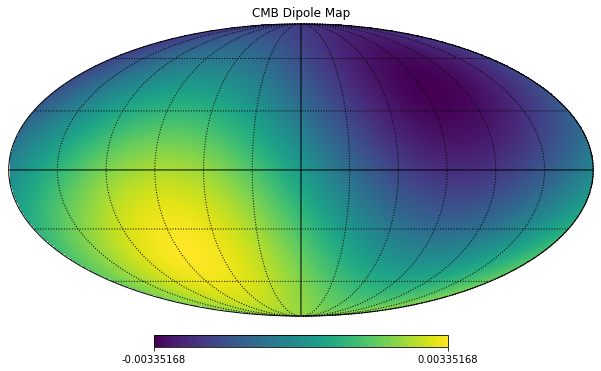

Dipole Fit result with bounds  status= 1 NEval= 12 cost=xi2= 0.7362157268268481
fres.x= [4.91424502e-02 4.91445573e-02 8.78375796e-01 1.48769604e+02]
Dipole Amp= 0.049144557345692425 ThetaDipol= 0.8783757957583558 PhiDipole= 148.76960353346857
Xi2/ndof = 3.744663012079348e-06


In [79]:
import healpy as hp
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Function for the dipole model
def cmb_model(tet, phi, T0, delT, tet_dip, phi_dip):
    udotudip = np.sin(np.radians(tet)) * np.sin(np.radians(tet_dip)) * (np.cos(np.radians(phi)) * np.cos(np.radians(phi_dip)) + np.sin(np.radians(phi)) * np.sin(np.radians(phi_dip)))
    udotudip += np.cos(np.radians(tet)) * np.cos(np.radians(tet_dip))
    return T0 + delT * udotudip

# CMB dipole parameters
nside = 128
theta = np.radians(48.26)
phi = np.radians(263.99)
t = 2.725
v = 369000
c = 3e8
cmb_dipole_vector = hp.ang2vec(theta, phi)

# Generate CMB dipole map
cmb_dipole_map = np.zeros(hp.nside2npix(nside))

for i in range(hp.nside2npix(nside)):
    pixel_theta, pixel_phi = hp.pix2ang(nside, i)
    pixel_vector = hp.ang2vec(pixel_theta, pixel_phi)
    dot_product = np.dot(cmb_dipole_vector, pixel_vector)
    cmb_dipole_map[i] = dot_product

cmb_dipole_map *= (t * (v * np.cos(pixel_theta)) / c)

# Plot the CMB dipole map
hp.mollview(cmb_dipole_map, title='CMB Dipole Map')
hp.graticule()
plt.show()


tet_pix_deg = np.degrees(pixel_theta)
phi_pix_deg = np.degrees(pixel_phi)


def cmb_residuals(param, tet_deg, phi_deg, data):
    resid = data - cmb_model(tet_deg, phi_deg, param[0], param[1], param[2], param[3])
    return resid


p0cmb = [2.7, 0.003, 48.26, 263.99]
fres = optimize.least_squares(cmb_residuals, p0cmb, args=(tet_pix_deg, phi_pix_deg, cmb_dipole_map), bounds=([0, 0, 0, 0], [10, 0.05, 180, 360]))


print('Dipole Fit result with bounds  status=', fres.status, 'NEval=', fres.nfev, 'cost=xi2=', np.sum(fres.fun**2))
print('fres.x=', fres.x)
print('Dipole Amp=', fres.x[1], 'ThetaDipol=', fres.x[2], 'PhiDipole=', fres.x[3])
print('Xi2/ndof =', np.sum(fres.fun**2) / (len(cmb_dipole_map) - 4))
